# Functions

In [1]:
def Kauffmann(x):
    return 0.61/(x-0.05)+1.3

def Kewley(x):
    return 0.61/(x-0.47)+1.19

def Stasinska(x):
    return (-30.787+1.1358*x+0.27297*x**2)*np.tanh(5.7409*x)-31.093

def Schawinski(x):
    return 1.05*x+0.45

def main_AGN_BPT2(x):
    return 0.73/(x+0.59)+1.33

def LINER_SY2_BPT2(x):
    return 1.18*x+1.30

def main_AGN_BPT3(x):
    return 0.72/(x-0.32)+1.30

def LINER_SY2_BPT3(x):
    return 1.89*x+0.76

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18
         }

palette = ['#66c2a5', '#fc8d62', '#8da0cb']
palette_darker = ['#46af8e', '#fb6930', '#6a83bb']
palette2 = ['#a6611a', '#018571']

# Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing new data

In [6]:
# data_raw = pd.read_csv('../../Data/GALEXFUV_to_SPIRE500_VACs2.csv')
data_raw = pd.read_csv('../../Data/GAMA-DR3-Matches/Attempt02/GALEXFUV_to_SPIRE500_VACs.csv')

In [8]:
data_raw

,LAMID,CATAID,DFAflux_GALEXFUV,DFAErr_GALEXFUV,DeblendErr_GALEXFUV,ABMagDFA_GALEXFUV,ABMagErrDFA_GALEXFUV,MinApCorr_GALEXFUV,MaxApCorr_GALEXFUV,PhotometryWarning_GALEXFUV,...,A_z,A_Y_UKIDSS,A_J_UKIDSS,A_H_UKIDSS,A_K_UKIDSS,A_Z_VIKING,A_Y_VIKING,A_J_VIKING,A_H_VIKING,A_K_VIKING
0,100000,100000,2.479260e-06,7.963562e-07,2.617298e-08,22.914194,6.236599,1.293492,1.753233,-,...,0.03305,0.02706,0.01986,0.01291,0.00804,0.03821,0.02927,0.02074,0.01323,0.00867
1,100001,100001,0.000000e+00,8.161955e-07,3.193431e-07,-999.000000,-999.000000,1.370058,1.820509,QI,...,0.03272,0.02679,0.01967,0.01279,0.00796,0.03783,0.02898,0.02053,0.01310,0.00858
2,100002,100002,1.556696e-06,1.300735e-06,5.138221e-09,23.419490,10.675610,1.142964,1.506265,-,...,0.03184,0.02607,0.01914,0.01244,0.00775,0.03681,0.02820,0.01998,0.01274,0.00835
3,100003,100003,5.865144e-06,8.889841e-07,1.193218e-07,21.979303,3.346163,1.260873,1.698566,-,...,0.03461,0.02834,0.02080,0.01352,0.00842,0.04001,0.03065,0.02171,0.01385,0.00908
4,100004,100004,1.493697e-05,6.755653e-07,1.844990e-07,20.964342,1.927995,1.418465,1.922459,-,...,0.03323,0.02721,0.01998,0.01299,0.00809,0.03842,0.02944,0.02085,0.01330,0.00872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119463,3021558,3021558,2.274809e-07,5.091504e-07,2.018976e-08,25.507637,41.344063,1.246210,1.692332,Q,...,0.04419,0.03618,0.02656,0.01727,0.01076,0.05109,0.03914,0.02773,0.01769,0.01159
119464,3021559,3021559,0.000000e+00,5.629622e-07,2.982534e-08,-999.000000,-999.000000,1.425687,1.873708,QI,...,0.03202,0.02622,0.01925,0.01252,0.00779,0.03703,0.02836,0.02009,0.01282,0.00840
119465,302156,302156,1.878590e-06,5.459135e-07,5.455340e-07,23.215420,5.081846,1.292771,1.752383,-,...,0.03004,0.02459,0.01806,0.01174,0.00731,0.03473,0.02661,0.01885,0.01202,0.00788
119466,3021560,3021560,0.000000e+00,4.806578e-07,1.257188e-07,-999.000000,-999.000000,1.372953,1.813215,QI,...,0.03693,0.03024,0.02220,0.01443,0.00899,0.04270,0.03271,0.02317,0.01478,0.00969


In [9]:
for i in data_raw.keys():
    print(i)

LAMID
CATAID
DFAflux_GALEXFUV
DFAErr_GALEXFUV
DeblendErr_GALEXFUV
ABMagDFA_GALEXFUV
ABMagErrDFA_GALEXFUV
MinApCorr_GALEXFUV
MaxApCorr_GALEXFUV
PhotometryWarning_GALEXFUV
PhotometryFlag_GALEXFUV
DFAflux_GALEXNUV
DFAErr_GALEXNUV
DeblendErr_GALEXNUV
ABMagDFA_GALEXNUV
ABMagErrDFA_GALEXNUV
MinApCorr_GALEXNUV
MaxApCorr_GALEXNUV
PhotometryWarning_GALEXNUV
PhotometryFlag_GALEXNUV
DFAflux_SDSSu
DFAErr_SDSSu
DeblendErr_SDSSu
ABMagDFA_SDSSu
ABMagErrDFA_SDSSu
MinApCorr_SDSSu
MaxApCorr_SDSSu
PhotometryWarning_SDSSu
PhotometryFlag_SDSSu
DFAflux_SDSSg
DFAErr_SDSSg
DeblendErr_SDSSg
ABMagDFA_SDSSg
ABMagErrDFA_SDSSg
MinApCorr_SDSSg
MaxApCorr_SDSSg
PhotometryWarning_SDSSg
PhotometryFlag_SDSSg
DFAflux_SDSSr
DFAErr_SDSSr
DeblendErr_SDSSr
ABMagDFA_SDSSr
ABMagErrDFA_SDSSr
MinApCorr_SDSSr
MaxApCorr_SDSSr
PhotometryWarning_SDSSr
PhotometryFlag_SDSSr
DFAflux_SDSSi
DFAErr_SDSSi
DeblendErr_SDSSi
ABMagDFA_SDSSi
ABMagErrDFA_SDSSi
MinApCorr_SDSSi
MaxApCorr_SDSSi
PhotometryWarning_SDSSi
PhotometryFlag_SDSSi
DFAflux_S

# Data subsets

In [10]:
# BPT diagrams
data_BPT1 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OI] 6300/Halpha)
data_BPT2 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['OIB_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([SII] 6716+6731/Halpha)
data_BPT3 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['SIIB_FLUX']>0) & 
                     (data_raw['SIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OII] 3726/Hbeta)
data_Stasinska1 = data_raw[(data_raw['HB_FLUX'] > 0) & 
                           (data_raw['OIIIR_FLUX'] > 0) & 
                           (data_raw['OIIB_FLUX'] > 0)]

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['HA_EW']>0)]

# Classification

In [11]:
# WHAN classification
SF = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) < -0.4) & (data_WHAN['HA_EW'] > 3)]
sAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 6)]
wAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 3) 
                 & (data_WHAN['HA_EW'] < 6)]

retired_and_passive = data_WHAN[(data_WHAN['HA_EW'] < 3)]
passive = data_WHAN[(data_WHAN['HA_EW'] < 0.5) & (data_WHAN['NIIR_EW'] < 0.5)]
retired = data_WHAN[((data_WHAN['HA_EW'] < 3) & (data_WHAN['NIIR_EW'] > 0.5)) | 
                    (data_WHAN['HA_EW'] < 3) & (data_WHAN['HA_EW'] > 0.5)]

orange_dots = data_WHAN[(data_WHAN['HA_EW'] < 0.5) | (data_WHAN['NIIR_EW'] < 0.5)]
unclassified = data_raw[(data_raw['HA_FLUX']<=0) |
                (data_raw['NIIR_FLUX']<=0) |
                (data_raw['HA_EW']<=0)]

print('WHAN classification')
print('Star forming:', len(SF))
print('Strong AGN:', len(sAGN))
print('Weak AGN:', len(wAGN))
print('Retired:', len(retired))
print('Passive:', len(passive))
print('Unclassified:', len(data_raw)-len(data_WHAN), " should be equal to ", len(unclassified))

WHAN classification
Star forming: 34209
Strong AGN: 22360
Weak AGN: 6115
Retired: 14435
Passive: 551
Unclassified: 41798  should be equal to  41798


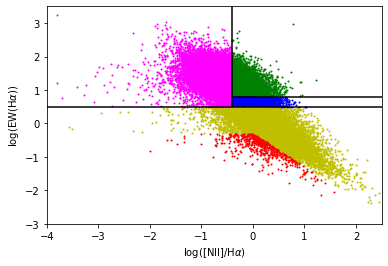

In [12]:
plt.plot(np.log10(SF['NIIR_FLUX']/SF['HA_FLUX']), np.log10(SF['HA_EW']), ls='', marker='o', markersize=1, 
         c='magenta')
plt.plot(np.log10(sAGN['NIIR_FLUX']/sAGN['HA_FLUX']), np.log10(sAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='g')
plt.plot(np.log10(wAGN['NIIR_FLUX']/wAGN['HA_FLUX']), np.log10(wAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='b')
plt.plot(np.log10(retired['NIIR_FLUX']/retired['HA_FLUX']), np.log10(retired['HA_EW']), ls='', marker='o', 
         markersize=1, c='y')
plt.plot(np.log10(passive['NIIR_FLUX']/passive['HA_FLUX']), np.log10(passive['HA_EW']), ls='', marker='o', 
         markersize=1, c='red')
#plt.plot(np.log10(orange_dots['NIIR_FLUX']/orange_dots['HA_FLUX']), np.log10(orange_dots['HA_EW']), ls='', 
#         marker='o', markersize=1, c='orange', alpha=0.2)

plt.axhline(np.log10(3), c='k')
plt.axhline(np.log10(6), xmin=0.555, xmax=1, c='k')
plt.axvline(-0.4, ymin=0.54, c='k')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-4,2.5)
plt.ylim(-3,3.5)
plt.show()

In [13]:
SF_class = {}
SF_class['CATAID'] = SF['CATAID'].values
SF_class['WHAN classification'] = 'SF'

SF_class_df = pd.DataFrame(SF_class)


sAGN_class = {}
sAGN_class['CATAID'] = sAGN['CATAID'].values
sAGN_class['WHAN classification'] = 'sAGN'

sAGN_class_df = pd.DataFrame(sAGN_class)


wAGN_class = {}
wAGN_class['CATAID'] = wAGN['CATAID'].values
wAGN_class['WHAN classification'] = 'wAGN'

wAGN_class_df = pd.DataFrame(wAGN_class)


retired_class = {}
retired_class['CATAID'] = retired['CATAID'].values
retired_class['WHAN classification'] = 'retired'

retired_class_df = pd.DataFrame(retired_class)


passive_class = {}
passive_class['CATAID'] = passive['CATAID'].values
passive_class['WHAN classification'] = 'passive'

passive_class_df = pd.DataFrame(passive_class)


unclassified_class = {}
unclassified_class['CATAID'] = unclassified['CATAID'].values
unclassified_class['WHAN classification'] = 'unclassified'

unclassified_class_df = pd.DataFrame(unclassified_class)


classification = pd.concat([SF_class_df, sAGN_class_df, wAGN_class_df, retired_class_df, passive_class_df, unclassified_class_df])
classification_sorted = classification.sort_values(by=['CATAID'])
classification_sorted

,CATAID,WHAN classification
3690,14283,sAGN
6791,14295,unclassified
5901,14296,SF
1048,14300,wAGN
6810,14301,unclassified
...,...,...
6114,3021557,wAGN
41794,3021558,unclassified
41795,3021559,unclassified
41797,3021560,unclassified


In [14]:
data_raw.sort_values(by=['CATAID'])

,LAMID,CATAID,DFAflux_GALEXFUV,DFAErr_GALEXFUV,DeblendErr_GALEXFUV,ABMagDFA_GALEXFUV,ABMagErrDFA_GALEXFUV,MinApCorr_GALEXFUV,MaxApCorr_GALEXFUV,PhotometryWarning_GALEXFUV,...,A_z,A_Y_UKIDSS,A_J_UKIDSS,A_H_UKIDSS,A_K_UKIDSS,A_Z_VIKING,A_Y_VIKING,A_J_VIKING,A_H_VIKING,A_K_VIKING
20012,14283,14283,4.959161e-06,5.106872e-07,5.621592e-08,22.161480,2.293512,1.303803,1.763267,-,...,0.05427,0.04444,0.03262,0.02121,0.01321,0.06275,0.04807,0.03405,0.02172,0.01424
20046,14295,14295,1.519702e-06,4.664399e-07,2.227008e-08,23.445604,5.061303,1.405684,1.867317,-,...,0.05059,0.04142,0.03041,0.01977,0.01231,0.05849,0.04481,0.03174,0.02025,0.01327
20057,14296,14296,2.564276e-06,4.848378e-07,1.941860e-08,22.877588,3.581608,1.300967,1.762854,-,...,0.05463,0.04473,0.03284,0.02135,0.01330,0.06317,0.04839,0.03428,0.02187,0.01433
20098,14300,14300,9.047083e-06,2.620990e-07,7.489817e-08,21.508728,1.828757,1.642948,2.071824,-,...,0.04755,0.03893,0.02858,0.01858,0.01157,0.05498,0.04212,0.02984,0.01903,0.01247
20109,14301,14301,3.783180e-06,4.420882e-07,3.998670e-08,22.455359,2.841986,1.286663,1.739219,-,...,0.04519,0.03700,0.02716,0.01766,0.01100,0.05225,0.04002,0.02835,0.01809,0.01185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119462,3021557,3021557,1.004720e-05,6.551995e-07,8.515830e-08,21.394888,2.559505,1.242331,1.686790,-,...,0.04802,0.03932,0.02887,0.01877,0.01169,0.05552,0.04253,0.03013,0.01922,0.01260
119463,3021558,3021558,2.274809e-07,5.091504e-07,2.018976e-08,25.507637,41.344063,1.246210,1.692332,Q,...,0.04419,0.03618,0.02656,0.01727,0.01076,0.05109,0.03914,0.02773,0.01769,0.01159
119464,3021559,3021559,0.000000e+00,5.629622e-07,2.982534e-08,-999.000000,-999.000000,1.425687,1.873708,QI,...,0.03202,0.02622,0.01925,0.01252,0.00779,0.03703,0.02836,0.02009,0.01282,0.00840
119466,3021560,3021560,0.000000e+00,4.806578e-07,1.257188e-07,-999.000000,-999.000000,1.372953,1.813215,QI,...,0.03693,0.03024,0.02220,0.01443,0.00899,0.04270,0.03271,0.02317,0.01478,0.00969


In [15]:
# BPT classification
sf = data_BPT1[(np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Stasinska(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
              (np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) < 10)]
seyfert = data_BPT1[((np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                    (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX'])))) | 
                   ((np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) >= 0.4) & 
                    (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))))]
liners = data_BPT1[((np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                   (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX'])))) | 
                  ((np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) >= 0.4) & 
                   (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))))]
composite = data_BPT1[(np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Stasinska(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                     (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                     (np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) < 0.4)]
unclassified_bpt = data_raw[(data_raw['HA_FLUX']<=0) | 
                            (data_raw['HB_FLUX']<=0) |
                            (data_raw['NIIR_FLUX']<=0) |
                            (data_raw['OIIIR_FLUX']<=0)]

print('BPT classification')
print('Star forming:', len(sf))
print('Seyfert:', len(seyfert))
print('LINERs:', len(liners))
print('Composite:', len(composite))
print('Unclassified:', len(data_raw)-len(data_BPT1), " should be equal to ", len(unclassified_bpt))

BPT classification
Star forming: 19324
Seyfert: 7269
LINERs: 2383
Composite: 26350
Unclassified: 64142  should be equal to  64142


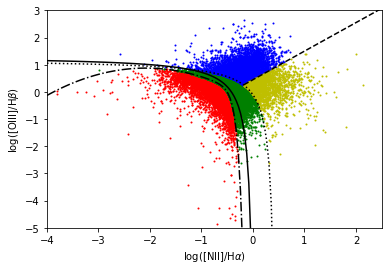

In [16]:
plt.plot(np.log10(sf['NIIR_FLUX']/sf['HA_FLUX']), 
         np.log10(sf['OIIIR_FLUX']/sf['HB_FLUX']), ls='', marker='o', markersize=1, c='r')
plt.plot(np.log10(composite['NIIR_FLUX']/composite['HA_FLUX']), 
         np.log10(composite['OIIIR_FLUX']/composite['HB_FLUX']), ls='', marker='o', markersize=1, c='g')
plt.plot(np.log10(seyfert['NIIR_FLUX']/seyfert['HA_FLUX']), 
         np.log10(seyfert['OIIIR_FLUX']/seyfert['HB_FLUX']), ls='', marker='o', markersize=1, c='b')
plt.plot(np.log10(liners['NIIR_FLUX']/liners['HA_FLUX']), 
         np.log10(liners['OIIIR_FLUX']/liners['HB_FLUX']), ls='', marker='o', markersize=1, c='y')

xx1 = np.linspace(-4, 0.4, 100)
xx2 = np.linspace(-4, 0, 100)
xx3 = np.linspace(-4, 0, 100)
xx4 = np.linspace(-0.18, 2.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-4,2.5)
plt.ylim(-5,3)
plt.show()

In [17]:
sf_class = {}
sf_class['CATAID'] = sf['CATAID'].values
sf_class['BPT classification'] = 'SF'

sf_class_df = pd.DataFrame(sf_class)


seyfert_class = {}
seyfert_class['CATAID'] = seyfert['CATAID'].values
seyfert_class['BPT classification'] = 'seyfert'

seyfert_class_df = pd.DataFrame(seyfert_class)


liners_class = {}
liners_class['CATAID'] = liners['CATAID'].values
liners_class['BPT classification'] = 'LINERs'

liners_class_df = pd.DataFrame(liners_class)


composite_class = {}
composite_class['CATAID'] = composite['CATAID'].values
composite_class['BPT classification'] = 'composite'

composite_class_df = pd.DataFrame(composite_class)


unclassified_bpt_class = {}
unclassified_bpt_class['CATAID'] = unclassified_bpt['CATAID'].values
unclassified_bpt_class['BPT classification'] = 'unclassified'

unclassified_bpt_class_df = pd.DataFrame(unclassified_bpt_class)


classification_bpt = pd.concat([sf_class_df, seyfert_class_df, liners_class_df, composite_class_df, unclassified_bpt_class_df])
classification_bpt_sorted = classification_bpt.sort_values(by=['CATAID'])
classification_bpt_sorted

,CATAID,BPT classification
4387,14283,composite
10740,14295,unclassified
3222,14296,SF
10763,14300,unclassified
10770,14301,unclassified
...,...,...
26349,3021557,composite
64137,3021558,unclassified
64138,3021559,unclassified
64140,3021560,unclassified


In [18]:
final_classification = pd.merge(classification_sorted, classification_bpt_sorted, on='CATAID')
final_classification.to_csv('../../Data/classified_dataset.csv')

# More subsets

In [19]:
# NIIR OIIR
retired_NIIR_OIIR = retired[(retired['NIIR_FLUX'] > 0) & (retired['OIIR_FLUX'] > 0)]
passive_NIIR_OIIR = passive[(passive['NIIR_FLUX'] > 0) & (passive['OIIR_FLUX'] > 0)]
unclassified_NIIR_OIIR = unclassified[(unclassified['NIIR_FLUX'] > 0) & (unclassified['OIIR_FLUX'] > 0)]

# NIIR Halpha
NIIR_Ha_retired = retired[(retired['NIIR_FLUX'] > 0) & (retired['HA_FLUX'] > 0)]
NIIR_Ha_passive = passive[(passive['NIIR_FLUX'] > 0) & (passive['HA_FLUX'] > 0)]

# EW(OII 2326)
EW_OII_retired = retired[retired['OIIR_EW'] > 0]
EW_OII_passive = passive[passive['OIIR_EW'] > 0]

In [20]:
OIIIR_NIIR_retired = retired[(retired['OIIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIIR_NIIR_passive = passive[(passive['OIIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIIB_NIIR_retired = retired[(retired['OIIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIIB_NIIR_passive = passive[(passive['OIIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIR_NIIR_retired = retired[(retired['OIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIR_NIIR_passive = passive[(passive['OIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIB_NIIR_retired = retired[(retired['OIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIB_NIIR_passive = passive[(passive['OIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIR_NIIR_retired = retired[(retired['OIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIR_NIIR_passive = passive[(passive['OIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIB_NIIR_retired = retired[(retired['OIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIB_NIIR_passive = passive[(passive['OIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

NIIB_NIIR_retired = retired[(retired['NIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
NIIB_NIIR_passive = passive[(passive['NIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

SIIR_NIIR_retired = retired[(retired['SIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
SIIR_NIIR_passive = passive[(passive['SIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

SIIB_NIIR_retired = retired[(retired['SIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
SIIB_NIIR_passive = passive[(passive['SIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIIR_SII_retired = retired[(retired['OIIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIIR_SII_passive = passive[(passive['OIIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIIB_SII_retired = retired[(retired['OIIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIIB_SII_passive = passive[(passive['OIIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIR_SII_retired = retired[(retired['OIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIR_SII_passive = passive[(passive['OIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIB_SII_retired = retired[(retired['OIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIB_SII_passive = passive[(passive['OIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIR_SII_retired = retired[(retired['OIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIR_SII_passive = passive[(passive['OIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIB_SII_retired = retired[(retired['OIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIB_SII_passive = passive[(passive['OIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

NIIR_SII_retired = retired[(retired['NIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
NIIR_SII_passive = passive[(passive['NIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

NIIB_SII_retired = retired[(retired['NIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
NIIB_SII_passive = passive[(passive['NIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]